# Bioenergy from SHARES database

Working with the tables
* Use of renewables for transport - details (nrg_ind_urtd)
* Use of renewables for electricity - details (nrg_ind_ured)
* Use of renewables for heating and cooling - details (nrg_ind_urhcd)

after making them more tidy in the notebook 'eu/tidy/shares.ipynb'

**Obtained variables**

Electricity
* Share of bioenergy on total electricity
* Share of bioenergy on renewable electricity consumption
* Share of renewables on total electricity consumption

Heating and cooling
* Share of bioenergy on total energy in heating and cooling
* Share of bioenergy on renewable heating and cooling consumption
* Share of renewables on total heating and cooling consumption

Transport
* Share of bioenergy on total energy in transport
* Share of bioenergy on renewable heating and cooling consumption
* Share of renewables on total heating and cooling consumption

Bioenergy (accross sectors)
* Share of bioenergy on total energy in transport
* Share of bioenergy on renewables

Renewables
* Share of renewables


In [1]:
import pandas as pd
import numpy as np
import os
import csv

csv_output_dir = 'output'

selected_codes = ['TOTAL', 'RA000', 'R5110-5150_W6000RI', 'R5200', 'R5300', 'W6210']
bio_codes = ['R5110-5150_W6000RI', 'R5200', 'R5300', 'W6210']

## Electricity

In [2]:
el = pd.read_csv(os.path.join(os.path.abspath(csv_output_dir), 'shares_electricity_tidy.csv'), decimal=',')
el.head()

,id,geo,year,siec,unit,GEP_NPUMP_MIX,GEP_RED,GFC_ELC,NMLPRD_MIX,NMLPRD_PURE
0,0,AL,2004,E7000,GWH,0.0,NaN,NaN,0.0,4256.8
1,1,AL,2004,R5110-5150_W6000RI,GWH,NaN,0.0,NaN,NaN,NaN
2,2,AL,2004,R5292P,GWH,NaN,0.0,NaN,NaN,NaN
3,3,AL,2004,R5292SB,GWH,NaN,0.0,NaN,NaN,NaN
4,4,AL,2004,R5292SP,GWH,NaN,0.0,NaN,NaN,NaN


In [3]:
# Masks for bioenergy, renewables and total electricity consumption

selected = el['siec'].str.fullmatch('|'.join(selected_codes))
bio = el['siec'].str.fullmatch('|'.join(bio_codes))
res = el['siec'].str.fullmatch('RA000')

In [4]:
# Bioelectricity generation
bio_el = el[bio].pivot_table(values='GEP_RED', index='year', columns='geo', aggfunc='sum')

# Renewable electricity generation
res_el = el[res].pivot_table(values='GEP_RED', index='year', columns='geo', aggfunc='sum')

# Gross final consumption 
gfc_el = el.pivot_table(values='GFC_ELC', index='year', columns='geo')

In [5]:
# Share of bioelectricity on total electricity consumption 
bio_el_share = bio_el / gfc_el
bio_el_share.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'electricity_bio_share.csv'), decimal=',')
bio_el_share

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.0,0.029071,0.000000,0.011265,0.000000,0.000000,0.010480,0.017204,0.077400,0.017107,...,0.006860,0.030086,0.000072,0.000000,0.047903,0.008321,0.000699,0.000507,0.018445,0.0
2005,0.0,0.035438,0.000000,0.016400,0.000000,0.000000,0.010559,0.023838,0.084355,0.019040,...,0.010481,0.031789,0.000106,0.000000,0.049181,0.007688,0.001139,0.000211,0.022547,0.0
2006,0.0,0.046358,0.000000,0.021157,0.000000,0.000033,0.012928,0.029535,0.079326,0.021694,...,0.013305,0.031628,0.000076,0.000000,0.054359,0.007273,0.013773,0.000331,0.023140,0.0
2007,0.0,0.057827,0.000000,0.025485,0.000000,0.000295,0.016691,0.038274,0.080905,0.024544,...,0.016658,0.034326,0.000604,0.000000,0.064402,0.007409,0.016004,0.000500,0.023420,0.0
2008,0.0,0.059418,0.000000,0.033844,0.000396,0.002272,0.020175,0.043740,0.082451,0.027293,...,0.023489,0.033755,0.000393,0.000000,0.069159,0.019481,0.017657,0.000718,0.024169,0.0
2009,0.0,0.063144,0.000000,0.040801,0.000199,0.005085,0.027188,0.050515,0.090394,0.030321,...,0.035073,0.038472,0.000190,0.000000,0.079163,0.014109,0.019720,0.001297,0.028503,0.0
2010,0.0,0.063243,0.000000,0.043035,0.000939,0.006600,0.030733,0.053317,0.121745,0.033050,...,0.040476,0.046446,0.001894,0.000000,0.079801,0.015343,0.023224,0.001582,0.032135,0.0
2011,0.0,0.064535,0.000000,0.048886,0.001418,0.010469,0.038769,0.060492,0.119698,0.037171,...,0.048136,0.053486,0.003273,0.000000,0.080629,0.017311,0.028227,0.001489,0.035858,0.0
2012,0.0,0.065425,0.000000,0.055191,0.001722,0.010562,0.048467,0.071395,0.123792,0.041366,...,0.063536,0.055213,0.003586,0.000164,0.082996,0.018422,0.032763,0.002442,0.039527,0.0


<AxesSubplot:title={'center':'Share of bioenergy in electricity EU27'}, xlabel='year', ylabel='Share'>

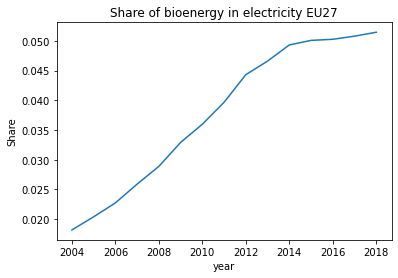

In [6]:
bio_el_share['EU27_2020'].plot(title='Share of bioenergy in electricity EU27', ylabel='Share')

In [7]:
# Share of bioenergy on renewable electricity consumption 

bio_on_res = bio_el / res_el
bio_on_res.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'electricity_bio_on_res_share.csv'), decimal=',')
bio_on_res

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.0,0.047173,0.000000,0.667581,0.000000,0.000000,0.283798,0.181995,0.325844,0.117309,...,0.310507,0.109841,0.000254,0.000000,0.093569,0.028426,0.004540,0.001816,0.726017,0.0
2005,0.0,0.056342,0.000000,0.697715,0.000000,0.000000,0.279194,0.224687,0.342245,0.125537,...,0.391699,0.114748,0.000369,0.000000,0.096624,0.026831,0.007241,0.000803,0.696477,0.0
2006,0.0,0.072627,0.000000,0.683312,0.000000,0.097915,0.315609,0.246345,0.330988,0.137294,...,0.442112,0.107918,0.000272,0.000000,0.104976,0.025763,0.083140,0.001341,0.628296,0.0
2007,0.0,0.088065,0.000000,0.701367,0.000000,0.400725,0.361207,0.277614,0.323607,0.147694,...,0.482802,0.106321,0.002149,0.000000,0.121033,0.026751,0.097193,0.002153,0.576338,0.0
2008,0.0,0.090194,0.000000,0.735941,0.004151,0.796466,0.389311,0.287560,0.317905,0.154931,...,0.537214,0.099095,0.001401,0.000000,0.128819,0.065017,0.103780,0.003155,0.511632,0.0
2009,0.0,0.092015,0.000000,0.661031,0.001821,0.863553,0.426252,0.287042,0.319900,0.154099,...,0.601540,0.102423,0.000615,0.000000,0.135898,0.041798,0.111007,0.005243,0.477093,0.0
2010,0.0,0.095304,0.000000,0.602656,0.007595,0.474944,0.408910,0.291028,0.371907,0.162263,...,0.608819,0.114375,0.006234,0.000000,0.143097,0.047649,0.130661,0.006248,0.468991,0.0
2011,0.0,0.096643,0.000000,0.539013,0.011232,0.303862,0.365409,0.287959,0.333661,0.165152,...,0.589743,0.116832,0.010514,0.000000,0.135230,0.055762,0.146216,0.005940,0.431605,0.0
2012,0.0,0.097017,0.000000,0.488779,0.010889,0.214365,0.415431,0.301915,0.319742,0.169848,...,0.594944,0.116225,0.010684,0.000576,0.138838,0.058237,0.163373,0.009001,0.384104,0.0


<AxesSubplot:title={'center':'Share of bioenergy on renewable electricity in EU27'}, xlabel='year', ylabel='Share'>

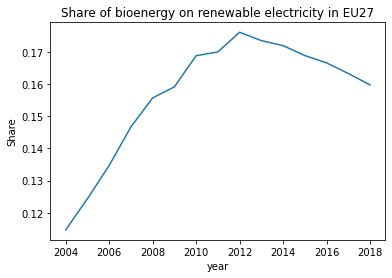

In [8]:
bio_on_res['EU27_2020'].plot(title='Share of bioenergy on renewable electricity in EU27', ylabel='Share')

In [9]:
# Share of renewables on total electricity consumption

res_el_share = res_el / gfc_el
res_el_share.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'electricity_res_share.csv'), decimal=',')
res_el_share

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.699786,0.616250,0.403799,0.016875,0.083577,0.000192,0.036926,0.094529,0.237538,0.145827,...,0.022093,0.273903,0.284274,0.184856,0.511959,0.292708,0.154030,0.278919,0.025405,0.004716
2005,0.761117,0.628988,0.404151,0.023506,0.086660,0.000237,0.037820,0.106094,0.246474,0.151669,...,0.026759,0.277033,0.287748,0.223659,0.508991,0.286543,0.157350,0.263483,0.032373,0.006112
2006,0.742081,0.638295,0.399971,0.030962,0.087297,0.000340,0.040961,0.119892,0.239663,0.158010,...,0.030094,0.293078,0.280542,0.236026,0.517825,0.282309,0.165661,0.247004,0.036830,0.009073
2007,0.796315,0.656643,0.406093,0.036337,0.088993,0.000736,0.046209,0.137866,0.250010,0.166180,...,0.034503,0.322849,0.281079,0.248119,0.532103,0.276974,0.164665,0.232140,0.040636,0.009708
2008,0.732989,0.658781,0.357606,0.045988,0.095438,0.002853,0.051822,0.152106,0.259358,0.176164,...,0.043723,0.340632,0.280753,0.258581,0.536866,0.299624,0.170135,0.227655,0.047238,0.009715
2009,0.707138,0.686237,0.388528,0.061724,0.109060,0.005888,0.063784,0.175986,0.282570,0.196761,...,0.058305,0.375616,0.308942,0.282520,0.582522,0.337557,0.177649,0.247306,0.059744,0.011362
2010,0.746180,0.663593,0.405763,0.071408,0.123578,0.013896,0.075158,0.183203,0.327354,0.203683,...,0.066484,0.406083,0.303778,0.281826,0.557672,0.322002,0.177742,0.253181,0.068520,0.013606
2011,0.661311,0.667766,0.388166,0.090696,0.126211,0.034455,0.106099,0.210071,0.358742,0.225071,...,0.081622,0.457798,0.311310,0.275261,0.596239,0.310446,0.193049,0.250595,0.083080,0.013684
2012,0.724272,0.674369,0.368573,0.112915,0.158158,0.049269,0.116667,0.236475,0.387162,0.243547,...,0.106794,0.475051,0.335669,0.285092,0.597791,0.316326,0.200544,0.271334,0.102908,0.014959


<AxesSubplot:title={'center':'Share of renewables in electricity in EU27'}, xlabel='year', ylabel='Share'>

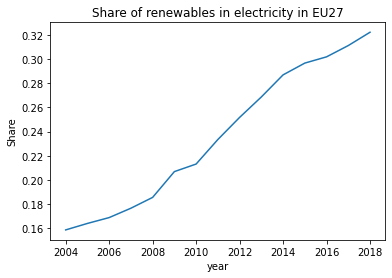

In [10]:
res_el_share['EU27_2020'].plot(title='Share of renewables in electricity in EU27', ylabel='Share')

## Heating and cooling

In [11]:
hc = pd.read_csv(os.path.join(os.path.abspath(csv_output_dir), 'shares_heat_tidy.csv'), decimal=',')
hc.head()

,id,geo,year,siec,unit,BIOG_G_ADJSHR,BIOG_G_SHR,BIOG_G_TRA,FC_IND_OTH_E,GFC_HEAT_CL_E,GHP_RED,PPRD_RED
0,0,AL,2004,R5110-5150_W6000RI,KTOE,NaN,NaN,NaN,233.018,NaN,0.0,NaN
1,1,AL,2004,R5160,KTOE,NaN,NaN,NaN,0.000,NaN,NaN,NaN
2,2,AL,2004,R5292,KTOE,NaN,NaN,NaN,0.000,NaN,NaN,NaN
3,3,AL,2004,R5292P,KTOE,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,4,AL,2004,R5292S,KTOE,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Masks for bioenergy, renewables and total heating anc cooling consumption
selected = hc['siec'].str.fullmatch('|'.join(selected_codes))
bio = hc['siec'].str.fullmatch('|'.join(bio_codes))
res = hc['siec'].str.fullmatch('RA000')

In [13]:
# Agregate final consumtion by adding together FC_IND_OTH_E and GHP_RED
hc['fc_hc_all'] = hc.loc[:, ['FC_IND_OTH_E', 'GHP_RED']].sum(axis=1)

In [14]:
# Bioheat generation - cumputed variable
bio_heat = hc[bio].pivot_table(values='fc_hc_all', index='year', columns='geo', aggfunc='sum')

# Renewable heat generation - original variable
res_heat = hc[res].pivot_table(values='GFC_HEAT_CL_E', index='year', columns='geo', aggfunc='sum')

# Gross final heat consumption 
gfc_heat = hc[hc['siec'] == 'TOTAL'].pivot_table(values='GFC_HEAT_CL_E', index='year', columns='geo')

In [15]:
# Share of bioheat on total heat consumption 
bio_heat_share = bio_heat / gfc_heat
bio_heat_share.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'heat_bio_share.csv'), decimal=',')
bio_heat_share

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.329456,0.192848,0.188412,0.028064,0.138071,0.008323,0.098453,0.066758,0.194835,0.095328,...,0.101867,0.322194,0.172614,0.140275,0.431675,0.183614,0.049949,0.145206,0.006918,0.518171
2005,0.373841,0.213724,0.165367,0.033654,0.133054,0.004487,0.107417,0.070866,0.215354,0.100102,...,0.101305,0.317891,0.178278,0.155627,0.463414,0.189142,0.049456,0.136563,0.007065,0.494518
2006,0.306583,0.227633,0.180574,0.035994,0.137575,0.006464,0.111038,0.076934,0.222935,0.106265,...,0.101346,0.338813,0.174815,0.157585,0.488085,0.185242,0.043730,0.121322,0.007974,0.488826
2007,0.322051,0.251748,0.168345,0.044300,0.127771,0.011190,0.121827,0.092739,0.252399,0.119843,...,0.104309,0.344834,0.193480,0.131655,0.499720,0.203899,0.061410,0.115225,0.009271,0.491709
2008,0.359694,0.251676,0.141033,0.048264,0.158878,0.019084,0.126844,0.092988,0.261758,0.122888,...,0.108078,0.368796,0.230190,0.165967,0.509909,0.192322,0.060189,0.115624,0.018799,0.477504
2009,0.336616,0.270586,0.170088,0.056507,0.197939,0.042099,0.139493,0.098394,0.274593,0.132062,...,0.114585,0.372110,0.262652,0.263815,0.535050,0.269205,0.080971,0.112367,0.022374,0.477171
2010,0.302656,0.282174,0.148721,0.057485,0.222560,0.037962,0.137268,0.107861,0.283975,0.133156,...,0.116493,0.328517,0.270745,0.230757,0.521230,0.266195,0.077643,0.101996,0.025430,0.455031
2011,0.297565,0.288508,0.140173,0.063258,0.226056,0.044533,0.149103,0.111390,0.301825,0.133688,...,0.130395,0.342669,0.241514,0.209445,0.523993,0.285064,0.091092,0.075468,0.028242,0.446389
2012,0.369864,0.300606,0.145231,0.069636,0.248157,0.043536,0.156788,0.119286,0.311744,0.144308,...,0.132557,0.311568,0.255928,0.230492,0.547977,0.294258,0.086544,0.073879,0.030375,0.492887


<AxesSubplot:title={'center':'Share of bioheat on total heat consumption in EU27'}, xlabel='year', ylabel='Share'>

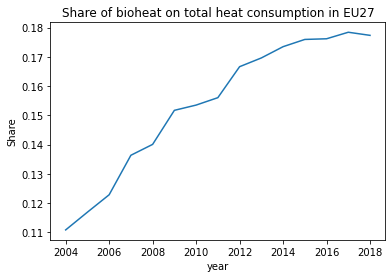

In [16]:
bio_heat_share['EU27_2020'].plot(title='Share of bioheat on total heat consumption in EU27', ylabel='Share')

In [17]:
# Share of bioheat on renewable heat 

bioheat_on_res = bio_heat / res_heat
bioheat_on_res.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'heat_bio_on_res_share.csv'), decimal=',')
bioheat_on_res

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.994193,0.956342,1.000000,0.986598,0.982295,0.089843,0.992448,0.927454,0.945005,0.939609,...,0.998050,0.991235,0.995643,1.000000,0.925746,1.000000,0.986678,0.823452,0.950083,0.999229
2005,0.990130,0.934853,1.000000,0.985629,0.933277,0.045008,0.990922,0.919110,0.945419,0.930990,...,0.997023,0.990734,0.994412,1.000000,0.913325,1.000000,0.983012,0.802452,0.940453,0.999229
2006,0.990130,0.926895,1.000000,0.969661,0.930176,0.061950,0.988136,0.914832,0.939053,0.920548,...,0.996698,0.990338,0.994280,1.000000,0.900840,1.000000,0.982387,0.797667,0.933100,0.999118
2007,0.971504,0.925253,1.000000,0.972609,0.921704,0.085589,0.984925,0.904891,0.940185,0.910473,...,0.997241,0.984690,0.993980,0.998246,0.889954,1.000002,0.985332,0.788985,0.927118,0.999118
2008,0.970683,0.920992,1.000000,0.961858,0.920377,0.131873,0.981722,0.900213,0.933645,0.901495,...,0.996169,0.983221,0.993630,0.992045,0.885384,1.000000,0.987124,0.768824,0.776127,0.999079
2009,0.969242,0.914626,1.000000,0.951260,0.914736,0.243117,0.978042,0.882227,0.930675,0.885993,...,0.992763,0.979366,0.993637,0.995403,0.872968,0.976640,0.990149,0.731874,0.773042,0.999085
2010,0.968297,0.911873,0.999994,0.950120,0.914624,0.201452,0.973744,0.894833,0.932700,0.884395,...,0.992810,0.969897,0.994394,0.994815,0.881681,0.945820,0.983031,0.708881,0.794902,0.998990
2011,0.946839,0.914879,1.000000,0.957154,0.912679,0.222478,0.968995,0.886147,0.941676,0.867949,...,0.992501,0.972534,0.993648,0.993154,0.871155,0.941202,0.983957,0.628437,0.768874,0.999013
2012,0.945952,0.912009,1.000000,0.956824,0.910969,0.199378,0.964751,0.889116,0.936806,0.869576,...,0.991299,0.939413,0.994106,0.993285,0.873348,0.935428,0.983091,0.609200,0.779974,0.998938


<AxesSubplot:title={'center':'Share of bioheat in heating and cooling in EU27'}, xlabel='year', ylabel='Share'>

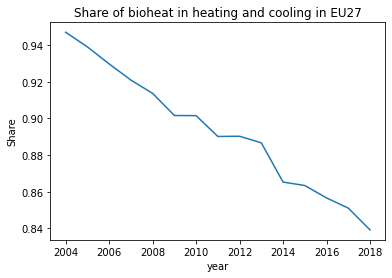

In [18]:
bioheat_on_res['EU27_2020'].plot(title='Share of bioheat in heating and cooling in EU27', ylabel='Share')

In [19]:
# Share of renewables on total heat

res_heat_share = res_heat / gfc_heat
res_heat_share.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'heat_res_share.csv'), decimal=',')
res_heat_share

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.331380,0.201652,0.188412,0.028445,0.140560,0.092639,0.099202,0.071980,0.206173,0.101455,...,0.102066,0.325043,0.173370,0.140275,0.466299,0.183614,0.050624,0.176338,0.007281,0.518571
2005,0.377567,0.228618,0.165367,0.034145,0.142566,0.099698,0.108401,0.077103,0.227787,0.107522,...,0.101608,0.320864,0.179280,0.155627,0.507392,0.189142,0.050310,0.170182,0.007512,0.494899
2006,0.309639,0.245587,0.180574,0.037120,0.147902,0.104343,0.112371,0.084097,0.237404,0.115437,...,0.101682,0.342119,0.175821,0.157585,0.541812,0.185242,0.044514,0.152096,0.008546,0.489257
2007,0.331498,0.272086,0.168345,0.045547,0.138625,0.130739,0.123692,0.102486,0.268457,0.131627,...,0.104597,0.350195,0.194652,0.131886,0.561512,0.203898,0.062325,0.146041,0.010000,0.492143
2008,0.370557,0.273266,0.141033,0.050178,0.172622,0.144713,0.129205,0.103295,0.280361,0.136316,...,0.108493,0.375090,0.231666,0.167298,0.575919,0.192322,0.060974,0.150391,0.024222,0.477944
2009,0.347298,0.295843,0.170088,0.059403,0.216389,0.173164,0.142625,0.111530,0.295047,0.149055,...,0.115421,0.379950,0.264334,0.265033,0.612909,0.275644,0.081776,0.153533,0.028943,0.477608
2010,0.312566,0.309445,0.148722,0.060503,0.243336,0.188444,0.140969,0.120538,0.304466,0.150561,...,0.117337,0.338713,0.272271,0.231960,0.591177,0.281443,0.078984,0.143883,0.031991,0.455491
2011,0.314272,0.315351,0.140173,0.066089,0.247684,0.200166,0.153874,0.125702,0.320519,0.154028,...,0.131380,0.352346,0.243058,0.210888,0.601493,0.302872,0.092577,0.120088,0.036732,0.446830
2012,0.390996,0.329609,0.145231,0.072779,0.272410,0.218359,0.162516,0.134163,0.332773,0.165952,...,0.133721,0.331663,0.257445,0.232050,0.627444,0.314570,0.088033,0.121272,0.038943,0.493411


<AxesSubplot:title={'center':'Share of renewables in heating and cooling in EU27'}, xlabel='year', ylabel='Share'>

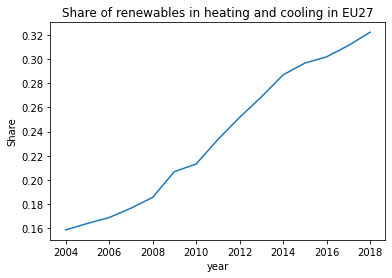

In [20]:
res_el_share['EU27_2020'].plot(title='Share of renewables in heating and cooling in EU27', ylabel='Share')

## Transport

Here I work with liquid biofuels and biogas without consideration if they are sustainable (according to RED)

In [21]:
tr = pd.read_csv(os.path.join(os.path.abspath(csv_output_dir), 'shares_transport_tidy.csv'), decimal=',')
tr.head()

,id,geo,year,siec,unit,BIOFCON_LIM_TRA,BIOF_FS_SHR,FC_TRA_E_RED,FC_TRA_OTH_E_RED,FC_TRA_RAIL_E_RED,FC_TRA_ROAD_E_RED,GFC_TRA_E_MULTI,GFC_TRA_E_NMULTI,LIM_TT,NRG_MNBRFT_E,ST_MS_TRA
0,0,AL,2004,E7000,KTOE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,1,AL,2004,E7100,KTOE,NaN,NaN,NaN,0.722,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2,AL,2004,E7200,KTOE,NaN,NaN,NaN,0.310,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,3,AL,2004,R5200,KTOE,NaN,NaN,NaN,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,4,AL,2004,R5200,PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# Masks for bioenergy, renewables and total consumption in transport
selected = tr['siec'].str.fullmatch('|'.join(selected_codes))
bio = tr['siec'].str.fullmatch('|'.join(bio_codes))
res = tr['siec'].str.fullmatch('RA000')

In [23]:
# Agregate final consumtion by adding together FC_TRA_OTH_E_RED, FC_TRA_RAIL_E_RED, FC_TRA_ROAD_E_RED
tr['fc_tr_all'] = tr.loc[:, ['FC_TRA_OTH_E_RED', 'FC_TRA_RAIL_E_RED', 'FC_TRA_ROAD_E_RED']].sum(axis=1)

In [24]:
# Biotransport consumption - cumputed variable
bio_trans = tr[bio].pivot_table(values='fc_tr_all', index='year', columns='geo', aggfunc='sum')

# Renewable transport - original variable (without multiplicators)
res_trans = tr[res].pivot_table(values='GFC_TRA_E_NMULTI', index='year', columns='geo')

# Gross final consumption 
gfc_trans = tr[tr['siec'] == 'TOTAL'].pivot_table(values='GFC_TRA_E_NMULTI', index='year', columns='geo')

In [25]:
# Share of biotransport on total
bio_trans_share = bio_trans / gfc_trans
bio_trans_share.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'transport_bio_share.csv'), decimal=',')
bio_trans_share

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016625,0.000000,0.007385,...,0.001416,0.000000,0.000000,0.0,0.020240,0.000000,0.000644,0.0,0.000402,0.0
2005,0.000000,0.008937,0.0,0.000000,0.000000,0.000000,0.000000,0.034598,0.000000,0.012963,...,0.004909,0.000000,0.000000,0.0,0.023629,0.000000,0.006413,0.0,0.001667,0.0
2006,0.000000,0.031897,0.0,0.000000,0.002526,0.000000,0.000000,0.062397,0.000868,0.021128,...,0.008129,0.011537,0.000000,0.0,0.032698,0.002680,0.022528,0.0,0.004325,0.0
2007,0.000000,0.039550,0.0,0.000000,0.001131,0.000000,0.000000,0.072662,0.001250,0.029177,...,0.007762,0.019623,0.000000,0.0,0.042415,0.007977,0.030391,0.0,0.008308,0.0
2008,0.000000,0.050229,0.0,0.000000,0.001878,0.019208,0.018022,0.057812,0.001125,0.034603,...,0.032571,0.020151,0.000000,0.0,0.051972,0.012086,0.034285,0.0,0.019796,0.0
2009,0.000000,0.066240,0.0,0.014831,0.001725,0.020355,0.032559,0.052211,0.002018,0.041098,...,0.045983,0.033567,0.000000,0.0,0.056162,0.017340,0.044753,0.0,0.025039,0.0
2010,0.000000,0.062358,0.0,0.040440,0.006355,0.019939,0.040727,0.056716,0.006265,0.046333,...,0.058271,0.050042,0.000000,0.0,0.059862,0.025194,0.044193,0.0,0.029386,0.0
2011,0.000000,0.065155,0.0,0.039792,0.007842,0.021708,0.052787,0.055029,0.030562,0.048238,...,0.060349,0.051119,0.038975,0.0,0.063766,0.018670,0.047290,0.0,0.027586,0.0
2012,0.000000,0.064259,0.0,0.040801,0.036825,0.023485,0.049313,0.057851,0.056302,0.053364,...,0.056041,0.051986,0.034086,0.0,0.075761,0.026959,0.045213,0.0,0.023434,0.0


<AxesSubplot:title={'center':'Share of bioenergy in transport in EU27 (w/o mult.)'}, xlabel='year', ylabel='Share'>

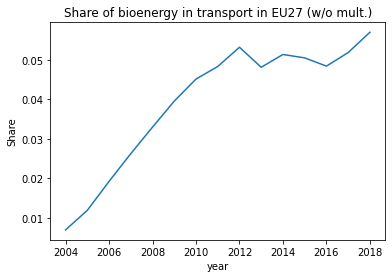

In [26]:
bio_trans_share['EU27_2020'].plot(title='Share of bioenergy in transport in EU27 (w/o mult.)', ylabel='Share')

In [27]:
# Share of bioenergy on renewables

biotrans_on_res = bio_trans / res_trans
biotrans_on_res.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'trans_bio_on_res_share.csv'), decimal=',')
biotrans_on_res

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.0,0.000000,NaN,0.000000,0.000000,NaN,0.000000,0.896490,0.000000,0.694228,...,0.187988,0.000000,0.000000,0.0,0.533115,0.000000,0.093800,0.0,0.229054,NaN
2005,0.0,0.289142,NaN,0.000000,0.000000,NaN,0.000000,0.944819,0.000000,0.798187,...,0.477093,0.000000,0.000000,0.0,0.572694,0.000000,0.588669,0.0,0.553873,NaN
2006,NaN,0.578874,NaN,0.000000,0.460507,NaN,0.000000,0.970094,0.332522,0.870130,...,0.651769,0.856876,0.000000,0.0,0.648048,0.450182,0.831384,0.0,0.767502,NaN
2007,NaN,0.631230,NaN,0.000000,0.267534,NaN,0.000000,0.971420,0.432023,0.902329,...,0.650830,0.911297,0.000000,0.0,0.706639,0.741345,0.878042,0.0,0.862018,NaN
2008,NaN,0.675174,0.0,0.000000,0.403748,1.000000,0.814161,0.962910,0.395780,0.910678,...,0.894645,0.908477,0.000000,0.0,0.778900,0.837783,0.900471,0.0,0.933610,NaN
2009,NaN,0.733131,0.0,0.831489,0.345728,1.000000,0.885967,0.950372,0.505589,0.919054,...,0.928598,0.939464,0.000000,0.0,0.779927,0.888779,0.917058,0.0,0.941547,NaN
2010,NaN,0.731342,0.0,0.928185,0.678044,1.000000,0.898945,0.948298,0.748282,0.923046,...,0.942142,0.956931,0.000000,0.0,0.794803,0.909158,0.918365,0.0,0.946591,NaN
2011,NaN,0.835803,0.0,0.922760,2.567009,inf,10.504008,0.960239,0.931173,1.591015,...,0.939449,17.211416,2.003435,0.0,0.773790,0.880255,0.913156,0.0,0.934834,NaN
2012,NaN,0.811773,0.0,0.922573,15.158294,inf,0.902986,0.954626,0.954359,1.190855,...,0.932291,15.055972,0.847537,0.0,0.800574,0.920486,0.901725,0.0,1.710389,NaN


<AxesSubplot:title={'center':'Share of bioenergy on renewable transport in EU27'}, xlabel='year', ylabel='Share'>

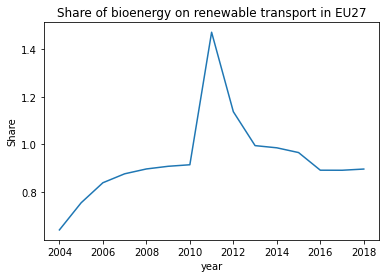

In [28]:
# Something is wrong with counting renewables and biofuels
# Biofuels consumption is higher in 2011, 2012 than renewables consumption
# Can be effect of sustainability criteria entering into force around that time, other factor, some mistake on my part (?)

biotrans_on_res['EU27_2020'].plot(title='Share of bioenergy on renewable transport in EU27', ylabel='Share')

In [29]:
# tr[ (tr['year'] == 2011) & (tr['geo'] == 'EU27_2020')]

In [30]:
# Share of renewables on total

res_trans_share = res_trans / gfc_trans
res_trans_share.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'trans_res_share.csv'), decimal=',')
res_trans_share

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.000986,0.023354,0.000000,0.002348,0.003622,0.000000,0.004706,0.018545,0.001784,0.010638,...,0.007531,0.001699,0.009268,0.001811,0.037966,0.003530,0.006864,0.001840,0.001754,0.0
2005,0.000951,0.030910,0.000000,0.002706,0.003374,0.000000,0.004323,0.036618,0.001777,0.016240,...,0.010290,0.001806,0.009921,0.001784,0.041259,0.003454,0.010894,0.001836,0.003011,0.0
2006,0.000000,0.055102,0.000000,0.002514,0.005485,0.000000,0.004224,0.064321,0.002609,0.024281,...,0.012473,0.013463,0.007991,0.001718,0.050456,0.005952,0.027098,0.001682,0.005635,0.0
2007,0.000000,0.062655,0.000000,0.002620,0.004229,0.000000,0.004115,0.074800,0.002894,0.032336,...,0.011927,0.021533,0.008631,0.002670,0.060023,0.010760,0.034612,0.001698,0.009638,0.0
2008,0.000000,0.074394,0.002891,0.002766,0.004652,0.019208,0.022136,0.060039,0.002842,0.037997,...,0.036407,0.022181,0.007197,0.002718,0.066726,0.014426,0.038075,0.001741,0.021203,0.0
2009,0.000000,0.090353,0.002964,0.017836,0.004990,0.020355,0.036749,0.054937,0.003991,0.044718,...,0.049518,0.035730,0.006869,0.005911,0.072010,0.019510,0.048801,0.000972,0.026594,0.0
2010,0.000000,0.085265,0.003707,0.043569,0.009372,0.019939,0.045305,0.059808,0.008372,0.050196,...,0.061850,0.052294,0.006964,0.002700,0.075316,0.027711,0.048122,0.001015,0.031044,0.0
2011,0.000000,0.077955,0.004116,0.043123,0.003055,0.000000,0.005025,0.057307,0.032820,0.030319,...,0.064239,0.002970,0.019454,0.007600,0.082408,0.021210,0.051787,0.001211,0.029509,0.0
2012,0.000000,0.079159,0.003543,0.044225,0.002429,0.000000,0.054611,0.060600,0.058994,0.044811,...,0.060111,0.003453,0.040218,0.008099,0.094633,0.029287,0.050140,0.001274,0.013701,0.0


<AxesSubplot:title={'center':'Share of renewables in transport in EU27 (w/o mult.)'}, xlabel='year', ylabel='Share'>

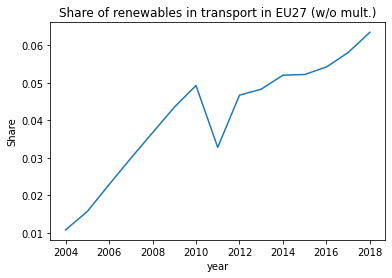

In [31]:
# Again, weird drop in renewables in 2011, 2012

res_trans_share['EU27_2020'].plot(title='Share of renewables in transport in EU27 (w/o mult.)', ylabel='Share')

<AxesSubplot:title={'center':'Bioenergy in transport in EU27'}, xlabel='year', ylabel='ktoe'>

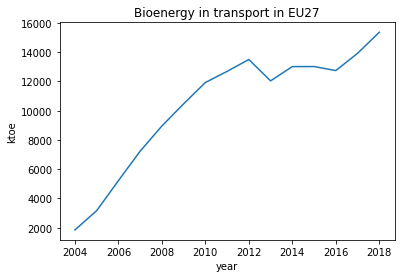

In [32]:
bio_trans['EU27_2020'].plot(title='Bioenergy in transport in EU27', ylabel='ktoe')

<AxesSubplot:title={'center':'Renewables in transport in Germany (w/o mult.)'}, xlabel='year', ylabel='ktoe'>

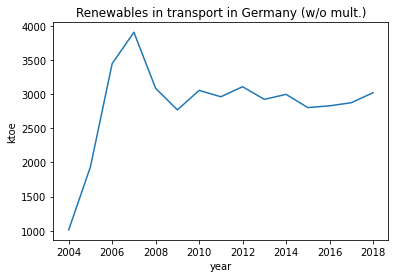

In [33]:
res_trans['DE'].plot(title='Renewables in transport in Germany (w/o mult.)', ylabel='ktoe')

<AxesSubplot:title={'center':'Bioenergy in transport in Germany'}, xlabel='year', ylabel='ktoe'>

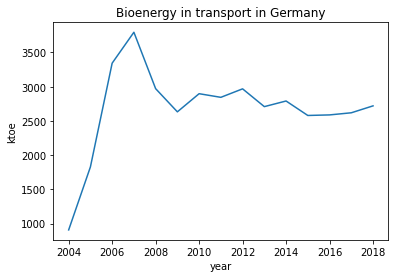

In [34]:
bio_trans['DE'].plot(title='Bioenergy in transport in Germany', ylabel='ktoe')

<AxesSubplot:title={'center':'Bioenergy in transport in Czech republic'}, xlabel='year', ylabel='ktoe'>

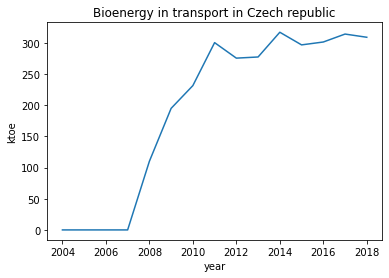

In [35]:
bio_trans['CZ'].plot(title='Bioenergy in transport in Czech republic', ylabel='ktoe')

## Bioenergy (accross sectors)

Values differ from SHARES aggregate xlsm tables probably due to different handling of bioenergy in transport sector (without accounting for multipliers and only sustainable biofuels, biogas) and few other methodological details.

In [36]:
# gfc_trans_multi = tr[tr['siec'] == 'TOTAL'].pivot_table(values='GFC_TRA_E_MULTI', index='year', columns='geo')

bioenergy = (bio_el * 3.6 / 41.868) + bio_heat + bio_trans
res = (res_el * 3.6 / 41.868) + res_heat + res_trans
total = (gfc_el * 3.6 / 41.868) + gfc_heat + gfc_trans

In [37]:
# All bioenergy across sectors
bioenergy.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'bioenergy_all_ktoe.csv'), decimal=',')
(bioenergy * 41.868).to_csv(os.path.join(os.path.abspath(csv_output_dir), 'bioenergy_all_tj.csv'), decimal=',')
bioenergy

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,233.018,2749.751495,182.072000,676.706390,708.942000,4.490000,1722.010865,9591.177505,1823.951008,44378.298569,...,4033.676774,2612.256115,3078.636938,802.522000,7326.135372,450.099695,347.708690,5537.321824,1131.206977,216.299
2005,230.032,3249.142041,181.738000,804.613256,691.315000,2.293000,1787.502681,11213.104156,2007.016891,48168.171822,...,4035.692534,2649.720586,3184.187907,802.522000,7817.703579,458.761418,374.124505,5326.822474,1327.551820,216.299
2006,230.032,3717.040076,181.499000,884.777283,741.384000,3.357328,1858.756151,14048.586052,2080.563516,52600.020553,...,4197.787097,2739.823095,3101.605889,802.355000,8254.823381,442.981224,386.089839,5131.013205,1495.057654,216.299
2007,214.985,4065.837122,181.212000,1016.015963,677.779000,6.046560,1950.843775,15772.460670,2289.234959,58305.480534,...,4236.615811,2844.485593,3236.830099,801.949000,8688.839351,440.476493,509.412664,4995.027543,1731.720753,216.323
2008,215.081,4256.835979,180.042000,1220.736367,756.064512,25.140261,2135.895366,16151.447230,2354.495417,62726.986950,...,4760.113952,2840.499631,3798.580396,804.242000,8776.125137,462.776628,515.906998,4771.311168,2845.001308,233.114
2009,209.993,4454.637328,179.851000,1467.999117,744.351457,38.512138,2356.417295,15695.159245,2414.349631,64253.299491,...,5244.182515,2929.142744,3756.590191,1055.221000,8995.752141,629.018478,644.262689,4602.176091,3214.042935,234.714
2010,205.001,4907.926348,179.253000,1873.299215,902.319009,35.526120,2515.355413,18505.295731,2829.138394,70136.361664,...,6017.706178,2684.745801,3953.968430,1026.607000,9847.940489,664.478065,690.365754,4468.745592,3829.447574,236.338
2011,208.011,4816.500543,178.967000,1860.643923,968.362519,41.004661,2694.624008,17988.112958,2823.023335,66842.852571,...,6449.218327,2706.106622,3694.798296,1022.070000,9383.804486,654.229776,722.998324,3569.414020,3733.957086,241.951
2012,206.506,5001.073787,178.824000,2050.969414,1097.237103,38.724663,2851.130531,20015.410145,2954.673061,73571.822439,...,6692.072072,2283.694662,3862.508978,1025.092907,10037.899348,651.100803,694.431436,3528.755991,3928.934928,247.492


In [38]:
# Gross final consumption of energy (any)
total.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'total_ktoe.csv'), decimal=',')
(total * 41.868).to_csv(os.path.join(os.path.abspath(csv_output_dir), 'total_tj.csv'), decimal=',')
total

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,1962.606852,26964.326656,2653.142170,37618.268486,10064.704280,1553.957370,27974.967026,223635.527721,15543.546707,839529.867055,...,60519.029695,18535.275628,26864.887847,10992.190940,35480.669934,4997.410348,10918.909383,60515.516155,144966.954961,1057.195764
2005,1874.220015,27925.058535,2795.811190,36511.198895,10343.531132,1553.896463,27695.853565,220201.603856,15597.981825,842577.667328,...,60577.452380,18580.379474,26750.910383,10263.690624,35150.845282,5088.219061,11440.166291,62608.391357,143338.488929,1102.311901
2006,1887.884047,27910.084636,2915.841887,36658.508326,10742.922896,1580.821696,27922.075156,225405.163732,15866.995403,842382.995714,...,62857.892404,18286.423962,26958.466759,10473.636882,34994.690849,5144.239381,11396.853399,68530.304121,140996.786679,1122.466963
2007,1843.716966,27582.197786,3039.613058,35394.855887,10642.873327,1655.791037,27392.991084,212611.174628,15878.884201,826215.552500,...,63230.759391,18310.697063,26191.313821,11014.014305,35295.134764,5084.357632,11166.936611,72088.199329,138896.381758,1165.330747
2008,1879.354561,27768.781365,3528.011041,36757.769248,10320.684683,1697.280653,27266.045334,221173.214546,15753.903767,834748.029091,...,63784.629589,17879.894019,26556.224409,9989.980829,34635.112987,5455.031937,11257.771812,69900.665196,139457.857371,1277.635730
2009,1934.994835,26712.935190,3302.109780,34647.026454,9114.984724,1690.270623,26185.287137,207411.238285,15182.516723,789942.290750,...,62932.056396,17691.574855,23942.920610,8932.368798,33464.436509,5025.579472,10571.962540,68872.057213,130094.374888,1287.793340
2010,1968.477556,28276.890946,3476.547230,37253.178199,9318.792845,1671.616776,27013.459933,222416.154364,15996.989843,824494.872641,...,67835.118717,17563.394312,24282.924555,9485.488991,36210.692323,5244.530477,11550.967822,73019.821068,135847.395372,1307.828801
2011,2105.029648,27313.043287,3589.621786,34433.636046,9706.341850,1620.577475,26181.617523,211356.981223,15086.905256,785084.229129,...,66172.160173,16741.381187,24612.575052,9816.325214,34545.879985,5220.949100,10678.333929,78243.718536,124499.271042,1392.055747
2012,1915.113589,27454.368454,3487.839489,34588.798953,9625.229396,1508.625972,26143.715360,214994.258701,14637.669512,786372.330881,...,65913.014933,15490.457406,24630.950101,9060.797588,34912.260985,5099.654408,10553.145479,81569.475803,128434.977726,1345.783635


In [39]:
# Gross final consumption of renewable energy
res.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'res_ktoe.csv'), decimal=',')
(res * 41.868).to_csv(os.path.join(os.path.abspath(csv_output_dir), 'res_tj.csv'), decimal=',')
res

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,601.119917,6336.900963,545.109489,749.702310,983.760368,50.045390,1914.170598,14362.173573,2440.256707,73324.424305,...,4287.502349,3719.563340,4483.509678,1393.034242,13952.306712,809.816175,739.066469,10331.934057,1450.586637,218.306069
2005,613.539949,7062.730299,560.764311,893.799335,1018.433711,51.035338,1990.298075,16364.867260,2639.139033,78768.151837,...,4303.422541,3799.150991,4639.745479,1458.554098,14576.199620,818.415699,765.409535,10295.396756,1754.199877,218.948115
2006,623.783899,7632.102662,566.165896,1008.700067,1086.227897,54.115113,2075.762400,19794.522291,2739.116630,84936.185292,...,4475.450046,3988.255249,4561.906347,1517.877138,15138.560628,806.457173,777.519508,10154.253047,2058.692200,220.171599
2007,610.752479,8079.201165,571.382765,1150.422342,1035.492580,69.511340,2185.845891,22224.818569,2982.934084,92783.123689,...,4534.733136,4243.342795,4730.930687,1573.961914,15788.153736,799.259630,902.347059,10134.267255,2422.678233,220.734378
2008,614.290242,8323.229445,588.480245,1381.637372,1147.587944,91.276830,2391.840581,23206.685877,3089.182608,99718.618175,...,5095.021636,4344.858504,5321.236133,1636.572646,15805.080863,824.035519,912.997871,10087.939010,4038.567972,237.985062
2009,618.017275,8569.492316,606.811693,1705.653994,1169.281290,104.901413,2640.386612,23488.166269,3187.494624,104153.935485,...,5620.901095,4567.790480,5286.122768,1952.475367,16334.269188,1017.797815,1026.791514,10396.721300,4668.215020,240.272938
2010,636.387549,9111.917494,647.289740,2192.484745,1387.304202,108.166899,2866.708528,27005.921188,3678.839079,113007.539017,...,6452.606122,4505.593617,5523.394278,1936.603692,17269.100591,1076.093810,1086.940508,10856.200262,5507.354396,243.168402
2011,643.486045,8934.870825,643.402745,2269.329310,1470.596195,107.467213,2895.963288,27410.363068,3727.369353,108333.888278,...,6999.669200,4391.353107,5210.547488,1935.346997,17032.376328,1062.877236,1152.744827,10609.318751,5774.298162,249.507369
2012,670.616608,9255.597546,625.890104,2591.741012,1631.509430,112.942061,3372.175887,30362.186563,3937.065742,120703.696753,...,7385.653776,4071.071770,5601.778759,1939.648958,17896.150184,1067.001671,1127.970922,11380.883067,6085.974761,255.597304


In [40]:
# Share of bioenergy on total energy
bioenergy_share = bioenergy / total
bioenergy_share.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'bioenergy_share.csv'), decimal=',')
bioenergy_share

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.118729,0.101977,0.068625,0.017989,0.070438,0.002889,0.061555,0.042888,0.117345,0.052861,...,0.066651,0.140934,0.114597,0.073008,0.206482,0.090067,0.031845,0.091503,0.007803,0.204597
2005,0.122735,0.116352,0.065004,0.022037,0.066835,0.001476,0.064540,0.050922,0.128672,0.057168,...,0.066620,0.142609,0.119031,0.078190,0.222404,0.090161,0.032703,0.085082,0.009262,0.196223
2006,0.121846,0.133179,0.062246,0.024136,0.069011,0.002124,0.066569,0.062326,0.131125,0.062442,...,0.066782,0.149828,0.115051,0.076607,0.235888,0.086112,0.033877,0.074872,0.010603,0.192700
2007,0.116604,0.147408,0.059617,0.028705,0.063684,0.003652,0.071217,0.074185,0.144169,0.070569,...,0.067002,0.155346,0.123584,0.072812,0.246177,0.086634,0.045618,0.069291,0.012468,0.185632
2008,0.114444,0.153296,0.051032,0.033210,0.073257,0.014812,0.078335,0.073026,0.149455,0.075145,...,0.074628,0.158866,0.143039,0.080505,0.253388,0.084835,0.045827,0.068258,0.020400,0.182457
2009,0.108524,0.166760,0.054465,0.042370,0.081662,0.022785,0.089990,0.075672,0.159022,0.081339,...,0.083331,0.165567,0.156898,0.118135,0.268815,0.125163,0.060941,0.066822,0.024705,0.182261
2010,0.104142,0.173567,0.051561,0.050286,0.096828,0.021253,0.093115,0.083201,0.176854,0.085066,...,0.088711,0.152860,0.162829,0.108229,0.271962,0.126699,0.059767,0.061199,0.028189,0.180710
2011,0.098816,0.176344,0.049857,0.054036,0.099766,0.025302,0.102920,0.085108,0.187117,0.085141,...,0.097461,0.161642,0.150118,0.104119,0.271633,0.125309,0.067707,0.045619,0.029992,0.173808
2012,0.107830,0.182159,0.051271,0.059296,0.113996,0.025669,0.109056,0.093097,0.201854,0.093559,...,0.101529,0.147426,0.156815,0.113135,0.287518,0.127675,0.065803,0.043261,0.030591,0.183902


<AxesSubplot:title={'center':'Share of bioenergy on total energy in EU27'}, xlabel='year', ylabel='Share'>

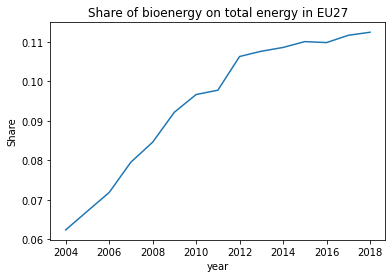

In [41]:
bioenergy_share['EU27_2020'].plot(title='Share of bioenergy on total energy in EU27', ylabel='Share')

In [42]:
# Share of bioenergy on renewables
bioenergy_res_share = bioenergy / res
bioenergy_res_share.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'bioenergy_res_share.csv'), decimal=',')
bioenergy_res_share

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.387640,0.433927,0.334010,0.902633,0.720645,0.089719,0.899612,0.667808,0.747442,0.605232,...,0.940799,0.702302,0.686658,0.576096,0.525084,0.555805,0.470470,0.535942,0.779827,0.990806
2005,0.374926,0.460041,0.324090,0.900217,0.678802,0.044930,0.898108,0.685194,0.760482,0.611518,...,0.937787,0.697451,0.686285,0.550218,0.536333,0.560548,0.488790,0.517398,0.756785,0.987901
2006,0.368769,0.487027,0.320576,0.877146,0.682531,0.062040,0.895457,0.709721,0.759575,0.619289,...,0.937959,0.686973,0.679892,0.528603,0.545285,0.549293,0.496566,0.505307,0.726217,0.982411
2007,0.352000,0.503247,0.317146,0.883168,0.654547,0.086987,0.892489,0.709678,0.767444,0.628406,...,0.934259,0.670341,0.684185,0.509510,0.550339,0.551106,0.564542,0.492885,0.714796,0.980015
2008,0.350129,0.511440,0.305944,0.883543,0.658829,0.275429,0.892992,0.695982,0.762174,0.629040,...,0.934268,0.653761,0.713853,0.491418,0.555272,0.561598,0.565069,0.472972,0.704458,0.979532
2009,0.339785,0.519825,0.296387,0.860666,0.636589,0.367127,0.892452,0.668216,0.757444,0.616907,...,0.932979,0.641260,0.710651,0.540453,0.550729,0.618019,0.627452,0.442656,0.688495,0.976864
2010,0.322132,0.538627,0.276929,0.854418,0.650412,0.328438,0.877437,0.685231,0.769030,0.620634,...,0.932601,0.595869,0.715858,0.530107,0.570264,0.617491,0.635146,0.411631,0.695333,0.971911
2011,0.323256,0.539068,0.278157,0.819909,0.658483,0.381555,0.930476,0.656252,0.757377,0.617008,...,0.921360,0.616235,0.709100,0.528107,0.550939,0.615527,0.627197,0.336441,0.646651,0.969715
2012,0.307935,0.540330,0.285711,0.791348,0.672529,0.342872,0.845487,0.659222,0.750476,0.609524,...,0.906091,0.560957,0.689515,0.528494,0.560897,0.610215,0.615647,0.310060,0.645572,0.968289


<AxesSubplot:title={'center':'Share of bioenergy on renewables in EU27'}, xlabel='year', ylabel='Share'>

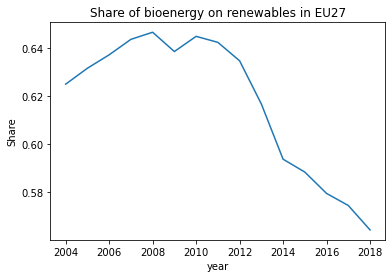

In [43]:
bioenergy_res_share['EU27_2020'].plot(title='Share of bioenergy on renewables in EU27', ylabel='Share')

In [44]:
# Share of renewables
res_share = res / total
res_share.to_csv(os.path.join(os.path.abspath(csv_output_dir), 'res_share.csv'), decimal=',')
res_share

geo,AL,AT,BA,BE,BG,CY,CZ,DE,DK,EA19,...,PL,PT,RO,RS,SE,SI,SK,TR,UK,XK
year,,,,,,,,,,,,,,,,,,,,,
2004,0.306286,0.235011,0.205458,0.019929,0.097744,0.032205,0.068424,0.064221,0.156995,0.087340,...,0.070846,0.200675,0.166891,0.126729,0.393237,0.162047,0.067687,0.170732,0.010006,0.206495
2005,0.327357,0.252917,0.200573,0.024480,0.098461,0.032843,0.071863,0.074318,0.169197,0.093485,...,0.071040,0.204471,0.173443,0.142108,0.414676,0.160845,0.066905,0.164441,0.012238,0.198626
2006,0.330414,0.273453,0.194169,0.027516,0.101111,0.034232,0.074341,0.087818,0.172630,0.100828,...,0.071199,0.218099,0.169220,0.144924,0.432596,0.156769,0.068222,0.148172,0.014601,0.196150
2007,0.331262,0.292914,0.187979,0.032503,0.097294,0.041981,0.079796,0.104533,0.187855,0.112299,...,0.071717,0.231741,0.180630,0.142905,0.447318,0.157200,0.080805,0.140582,0.017442,0.189418
2008,0.326862,0.299733,0.166802,0.037588,0.111193,0.053778,0.087722,0.104925,0.196090,0.119460,...,0.079879,0.243002,0.200376,0.163821,0.456331,0.151060,0.081099,0.144318,0.028959,0.186270
2009,0.319390,0.320799,0.183765,0.049229,0.128281,0.062062,0.100835,0.113244,0.209945,0.131850,...,0.089317,0.258190,0.220780,0.218584,0.488108,0.202523,0.097124,0.150957,0.035883,0.186577
2010,0.323289,0.322239,0.186188,0.058854,0.148872,0.064708,0.106121,0.121421,0.229971,0.137063,...,0.095122,0.256533,0.227460,0.204165,0.476906,0.205184,0.094100,0.148675,0.040541,0.185933
2011,0.305690,0.327128,0.179240,0.065904,0.151509,0.066314,0.110611,0.129688,0.247060,0.137990,...,0.105780,0.262305,0.211703,0.197156,0.493036,0.203579,0.107952,0.135593,0.046380,0.179237
2012,0.350171,0.337127,0.179449,0.074930,0.169503,0.074864,0.128986,0.141223,0.268968,0.153494,...,0.112052,0.262812,0.227428,0.214070,0.512604,0.209230,0.106885,0.139524,0.047386,0.189925


<AxesSubplot:title={'center':'Share of renewables in EU27'}, xlabel='year', ylabel='Share'>

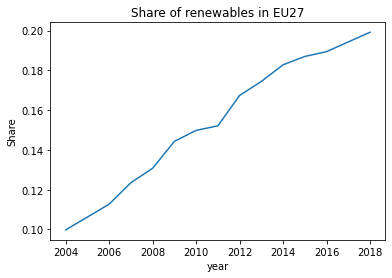

In [45]:
res_share['EU27_2020'].plot(title='Share of renewables in EU27', ylabel='Share')